

# Project: Investigate a Dataset (No_show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.



### Question(s) for Analysis
What are the factors that will help us to predict if the patients will show up for the appointment or not ? 

In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



: 

<a id='wrangling'></a>
## Data Wrangling


In this step we will load the data , assess the dataset and clean it to be ready for analysis . 

### General Properties

In [48]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [49]:
#the shape of the data
df.shape

(110527, 14)

In [1]:
#check if there any duplication
df.duplicated().any()

there is no duplicated rows

In [51]:
# check the number of unique and duplicated values of patientId
df['PatientId'].duplicated().value_counts()

False    62299
True     48228
Name: PatientId, dtype: int64

there are 62299 unique value out of 110527 

there are 48228 duplicated value out of 110527

In [52]:
#check the number of duplicated patient ids and Noshow to check if there 
#patient id has the same status of showing or not to delete them in the cleaning stage
df.duplicated(['PatientId','No-show']).sum()

38710

there are 38710 patient ids have the same status of showing

In [53]:
#check if there are any missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing values

In [54]:
#get some statistical information about our data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We noticed that the minimum age = -1  and that doesn't make sense 

In [55]:
#show the rows that have the age == -1 
df[df.Age==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


we notice that there is only one row so we will delet it and that will not affect our data



### Data Cleaning (Modifying the data to be ready for analysis)

In [56]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df=df[df.Age>=0]

In [57]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [58]:
#Renaming the wrong columns names
df=df.rename(columns={'Hipertension':'Hypertension'})
df=df.rename(columns={'Handcap':'Handicap'})
df=df.rename(columns={'No-show':'No_show'})
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [59]:
#Removing duplicated patient ids with duplicated showing status 
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

In [15]:
#Removing unnecessary columns
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)


In [60]:
df.shape

(71816, 14)

## Data wrangling summary
 first we loaded the csv file and showed the properities of the data . then checked if there any duplicated or missing values . then showed some statistical informations .then renamed the wrong columns' names and deleted the rows that have the same patient ids and same show status and finally we deleted the unnecessary columns 

<a id='eda'></a>
## Exploratory Data Analysis


### General look

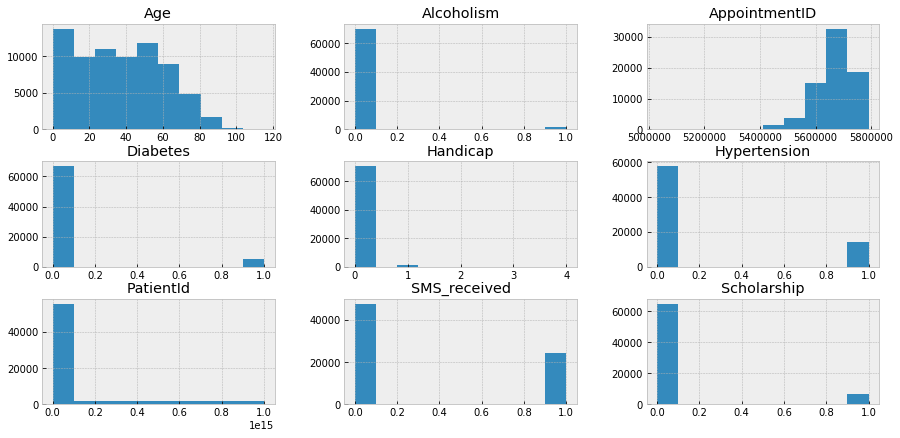

In [61]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,7));

In [62]:
# dividing the patients into show and noshow and then explore them
show=df.No_show=='No'
noshow=df.No_show=='Yes'
df['No_show'].value_counts()

No     54153
Yes    17663
Name: No_show, dtype: int64

number of showed patients (54153) greater than no showed patients (17663)

In [63]:
df[show].mean() , df[noshow].mean()

(PatientId        1.468194e+14
 AppointmentID    5.672494e+06
 Age              3.722917e+01
 Scholarship      9.133381e-02
 Hypertension     2.029435e-01
 Diabetes         7.286762e-02
 Alcoholism       2.359980e-02
 Handicap         2.090374e-02
 SMS_received     2.972319e-01
 dtype: float64, PatientId        1.460285e+14
 AppointmentID    5.648098e+06
 Age              3.437627e+01
 Scholarship      1.084187e-01
 Hypertension     1.709223e-01
 Diabetes         6.510785e-02
 Alcoholism       2.944007e-02
 Handicap         1.777727e-02
 SMS_received     4.530940e-01
 dtype: float64)

mean age for showed patient is 37 and for no showed patient is 34

showed patient recieve sms less than no showed patient that is maen there is something wrong on sms system

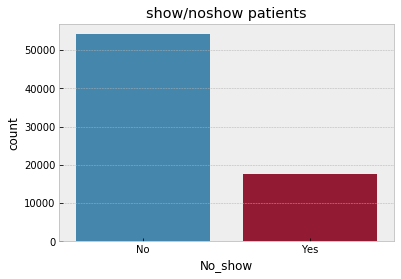

In [70]:
plt.style.use('bmh')

ax=sns.countplot(x=df.No_show ,data=df )
ax.set_title('show/noshow patients');


# the influencing factors on attendance rate 

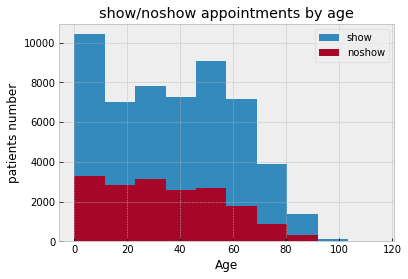

In [82]:
#check if the age affect the attendance
def attendance(df,col_name,attended,absent):
    df[col_name][show].hist(label='show')
    df[col_name][noshow].hist(label='noshow')
    plt.legend()
    plt.title('show/noshow appointments by age')
    plt.xlabel('Age')
    plt.ylabel('patients number')
    
attendance(df,'Age',show,noshow)


    


    

Ages from 0 to 10 the most showing

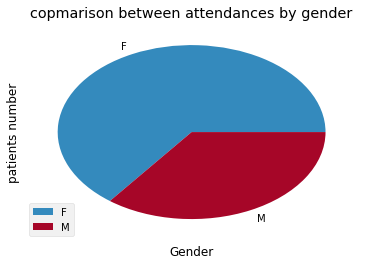

In [83]:
#check if the gender affect the attendance rate

#what is the percentage sexes attending ?
def attendance(df,col_name,attended,absent):
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend()
    plt.title('copmarison between attendances by gender')
    plt.xlabel('Gender')
    plt.ylabel('patients number')
    
attendance(df,'Gender',show,noshow)

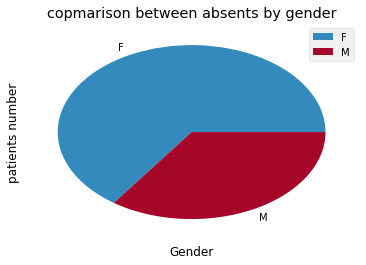

In [84]:
#what is the percentage sexes absent ?
def attendance(df,col_name,attended,absent):
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='noshow')
    plt.legend()
    plt.title('copmarison between absents by gender')
    plt.xlabel('Gender')
    plt.ylabel('patients number')
    
attendance(df,'Gender',show,noshow)


Gender has no effect on attendance

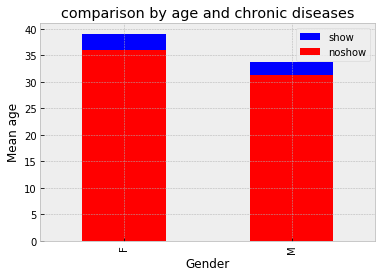

In [86]:
#check if the age and chronic gender affect the attendance together (gender mean age)
df[show].groupby('Gender').Age.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Gender').Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('comparison by age and chronic diseases')
plt.xlabel('Gender')
plt.ylabel('Mean age');




In [87]:
print(df[show].groupby('Gender').Age.mean(),df[noshow].groupby('Gender').Age.mean(),df[show].groupby('Gender').Age.median(),df[noshow].groupby('Gender').Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39
M    32
Name: Age, dtype: int64 Gender
F    34
M    29
Name: Age, dtype: int64


there is no correlation between age and genderaffecting the show rate
the mean and median of the sexes ages are almost the same

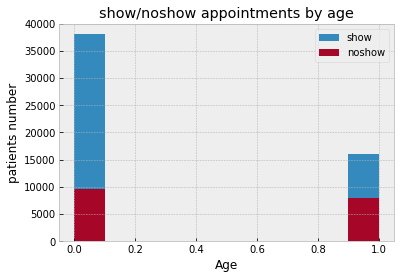

In [91]:
#check if the recieving sms affect the attendance 
def attendance(df,col_name,attended,absent):
    df[col_name][show].hist(label='show')
    df[col_name][noshow].hist(label='noshow')
    plt.legend()
    plt.title('coparison by sms_received')
    plt.xlabel('Age')
    plt.ylabel('patients number')
    
attendance(df,'SMS_received',show,noshow)

show patients without receiving sms greater than show patient with reveiving sms 

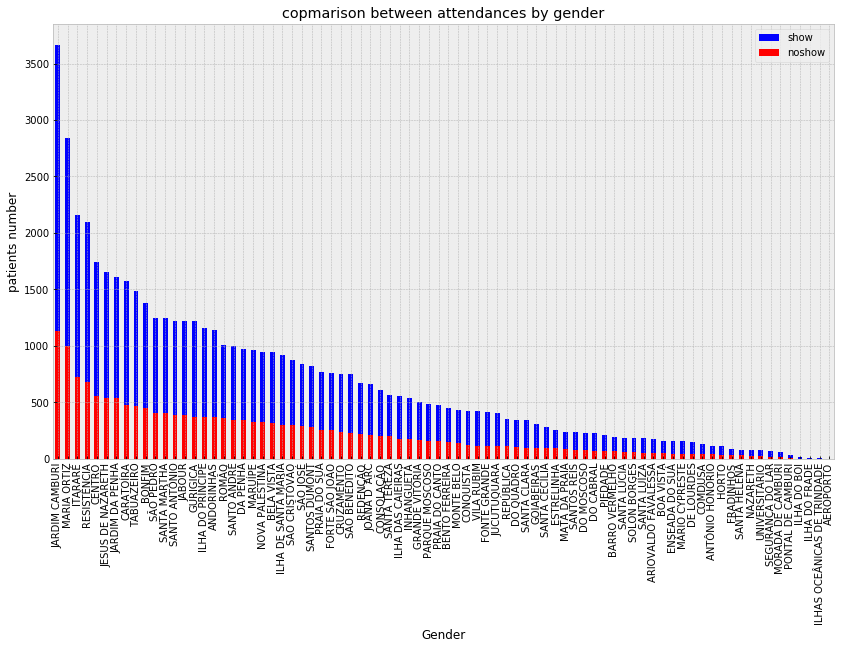

In [94]:
#check if the neighbourhood affect the attendance
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=(14,8))
    df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
    df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='red',label='noshow')
    plt.legend()
    plt.title('copmarison between attendances by gender')
    plt.xlabel('Gender')
    plt.ylabel('patients number')
    
attendance(df,'Neibourhood',show,noshow)

neighbourhood has a large effect on the attendance rate 

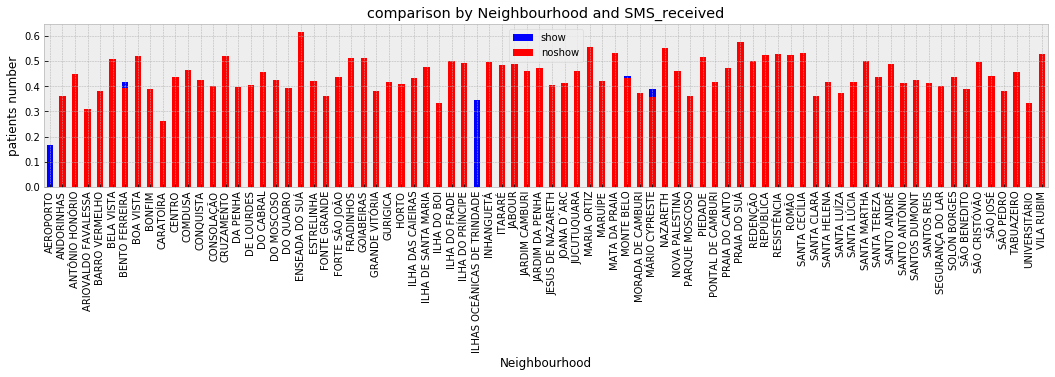

In [103]:
#the effect of neighbourhood and sms_receiving 
plt.figure(figsize=(18,3))
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('comparison by Neighbourhood and SMS_received')
plt.xlabel('Neighbourhood')
plt.ylabel('patients number');

Only 5 neighbourhood received sms 

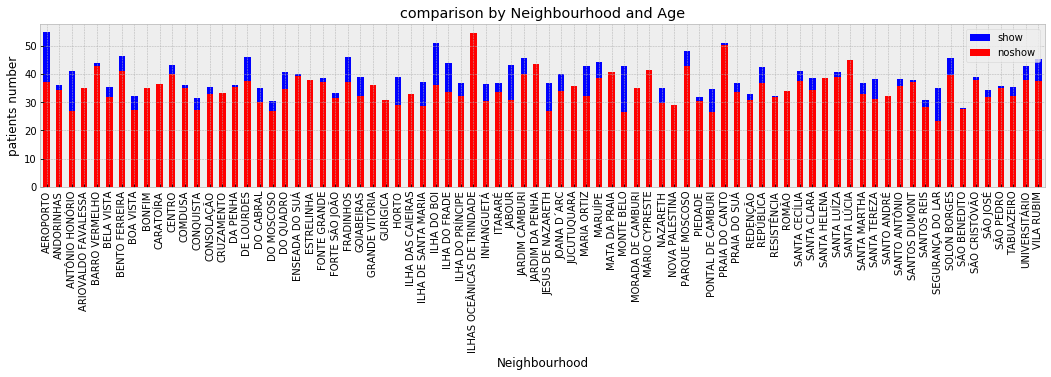

In [104]:
#the effect of neighbourhood and age  
plt.figure(figsize=(18,3))
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('comparison by Neighbourhood and Age')
plt.xlabel('Neighbourhood')
plt.ylabel('patients number');

<a id='conclusions'></a>
## Conclusions

Neighbourhood has a large effect on the attendence 

Number of showed patients from specific neighbourhood affected by recieving sms and age 

Age has effect on the attendance rate , ages from 0 to 10 are the most showing

showed patient recieve sms less than no showed patient that is maen there is something wrong on sms system

## limitations 
there is no correlation between showing , gender and chronic diseases and 

In [105]:
from subprocess import call
call(['python','-m','nbconvert','investigate-a-dataset-template.ipynb'])

0